In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [2]:
df = pd.read_csv(r'/Users/manueltanguma/Downloads/imdb_labelled.txt', sep='\t', header=None)

In [3]:
df.head(5)

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
df.columns = ['review', 'hit']

In [5]:
columns_titles = ['hit', 'review']
df = df.reindex(columns=columns_titles)
df.head(5)

,hit,review
0,0,"A very, very, very slow-moving, aimless movie ..."
1,0,Not sure who was more lost - the flat characte...
2,0,Attempting artiness with black & white and cle...
3,0,Very little music or anything to speak of.
4,1,The best scene in the movie was when Gerardo i...


In [6]:
df['length']=df['review'].apply(len)
df.head(5)

,hit,review,length
0,0,"A very, very, very slow-moving, aimless movie ...",87
1,0,Not sure who was more lost - the flat characte...,99
2,0,Attempting artiness with black & white and cle...,188
3,0,Very little music or anything to speak of.,44
4,1,The best scene in the movie was when Gerardo i...,108


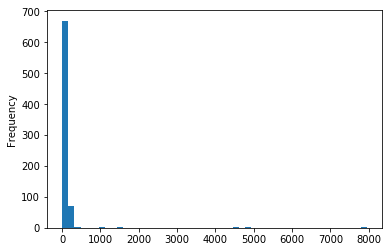

In [7]:
df['length'].plot(bins=50,kind='hist')

In [8]:
df.length.describe()

count     748.000000
mean      110.986631
std       380.627728
min         7.000000
25%        42.750000
50%        72.000000
75%       112.250000
max      7944.000000
Name: length, dtype: float64

In [9]:
df[df['length']==7944]['review'].iloc[0]

' In fact, it\'s hard to remember that the part of Ray Charles is being acted, and not played by the man himself.  \t1\nRay Charles is legendary.  \t1\nRay Charles\' life provided excellent biographical material for the film, which goes well beyond being just another movie about a musician.  \t1\nHitchcock is a great director.  \t1\nIronically I mostly find his films a total waste of time to watch.  \t0\nSecondly, Hitchcock pretty much perfected the thriller and chase movie.  \t1\nIt\'s this pandering to the audience that sabotages most of his films.  \t0\nHence the whole story lacks a certain energy.  \t0\nThe plot simply rumbles on like a machine, desperately depending on the addition of new scenes.  \t0\nThere are the usual Hitchcock logic flaws.  \t0\nMishima is extremely uninteresting.  \t0\nThis is a chilly, unremarkable movie about an author living/working in a chilly abstruse culture.  \t0\nThe flat reenactments don\'t hold your attention because they are emotionally adrift and

In [10]:
df[df['length']==7]['review'].iloc[0]

'10/10  '

In [11]:
keywords = ['best', 'awesome', 'great', 'stupendous', 'worthwhile', 'first-rate', 'insightful', 'clever',
            'enjoyable', 'riveting', 'absorbing', 'charming', 'comical', 'charismatic', 'original', 'tender',
            'hilarious', 'powerful', 'fascinating', 'legendary', 'imaginative', 'good', 'cool']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [12]:
df['allcaps'] = df.review.str.isupper()

In [13]:
df['hit'] = (df['hit'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [14]:
df.head(5)

,hit,review,length,best,awesome,great,stupendous,worthwhile,first-rate,insightful,...,original,tender,hilarious,powerful,fascinating,legendary,imaginative,good,cool,allcaps
0,False,"A very, very, very slow-moving, aimless movie ...",87,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,Not sure who was more lost - the flat characte...,99,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,Attempting artiness with black & white and cle...,188,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,Very little music or anything to speak of.,44,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,The best scene in the movie was when Gerardo i...,108,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


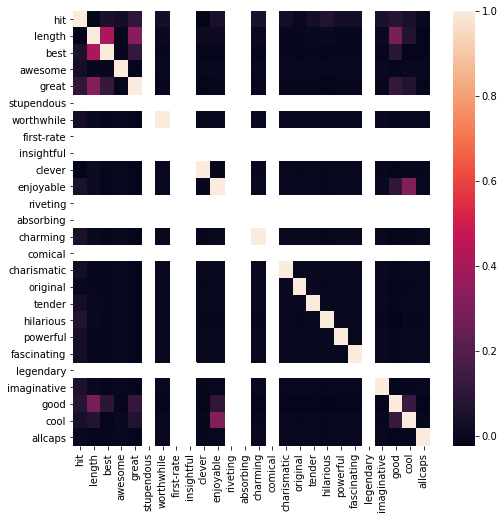

In [15]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr())

In [16]:
df.isnull().sum()

hit            0
review         0
length         0
best           0
awesome        0
great          0
stupendous     0
worthwhile     0
first-rate     0
insightful     0
clever         0
enjoyable      0
riveting       0
absorbing      0
charming       0
comical        0
charismatic    0
original       0
tender         0
hilarious      0
powerful       0
fascinating    0
legendary      0
imaginative    0
good           0
cool           0
allcaps        0
dtype: int64

In [17]:
# data signifies the inputs x
# target signifies an outcome (y or dependent variable)
data = df[keywords + ['allcaps']]
target = df['hit']

In [18]:
data.shape

(748, 24)

In [19]:
target.shape

(748,)

In [20]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 333


In [21]:
a = ((target == y_pred).sum()/((target == y_pred).sum() + (target != y_pred).sum())) * 100

print ('The accuracy rate of using the Bernoulli classifier is {}%.'.format(a))

The accuracy rate of using the Bernoulli classifier is 55.481283422459896%.


In [22]:
# Now we're importing the Multinomial classifier to compare to the model above.
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
mnb = MultinomialNB()

# Fit our model to the data.
mnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred2 = mnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred2).sum()
))

Number of mislabeled points out of a total 748 points : 361


In [23]:
b = ((target == y_pred2).sum()/((target == y_pred2).sum() + (target != y_pred2).sum())) * 100

print ('The accuracy rate of using the Multinomial classifier is {}%.'.format(b))

The accuracy rate of using the Multinomial classifier is 51.7379679144385%.


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[343,  19],
       [314,  72]])

### TP|FP
### FN|TN


In [25]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.5
Testing on Sample: 0.554812834225


In [26]:
# Test your model with different holdout groups.
# different holdout group, 40%

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=20)
print('With 40% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 40% Holdout: 0.54
Testing on Sample: 0.554812834225


In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([ 0.51315789,  0.51315789,  0.57333333,  0.53333333,  0.57333333,
        0.52      ,  0.66216216,  0.52702703,  0.52702703,  0.5       ])